In [2]:
import pandas as pd
import torch as t
import numpy as np

# LM-37 bacteria

In [3]:
df = pd.read_csv(
    "bacteria-37.csv",
    header=1,
    usecols= [
        "Position X",
        "Position Y",
        "Position Z",
        "Time",
        "TrackID",
        "ID"
    ]
)

In [4]:
display(df.head())
df.info()

,Position X,Position Y,Position Z,Time,TrackID,ID
0,248.6320,10.7085,0.1815,1,1000000008,8
1,346.6570,10.7085,0.1815,1,1000000014,14
2,52.1679,11.1991,0.1815,1,1000000015,15
3,32.9705,11.6746,0.1815,1,1000000018,18
4,272.7170,11.8309,0.1815,1,1000000020,20


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17822 entries, 0 to 17821
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Position X  17822 non-null  float64
 1   Position Y  17822 non-null  float64
 2   Position Z  17822 non-null  float64
 3   Time        17822 non-null  int64  
 4   TrackID     17822 non-null  int64  
 5   ID          17822 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 835.5 KB


In [5]:
pd.unique(df["TrackID"]).shape

(299,)

In [6]:
(df[df["TrackID"] == 1000000015]).sort_values(by="Time")

,Position X,Position Y,Position Z,Time,TrackID,ID
2,52.1679,11.1991,0.1815,1,1000000015,15
298,52.1539,11.2009,0.1815,2,1000000015,1557
595,52.1554,11.2338,0.1815,3,1000000015,3272
893,52.2164,11.2702,0.1815,4,1000000015,4848
1191,52.1607,11.2256,0.1815,5,1000000015,6400
1489,52.2040,11.2801,0.1815,6,1000000015,8034
1787,52.1384,11.2526,0.1815,7,1000000015,9610
2085,52.2176,11.2861,0.1815,8,1000000015,11335
2383,52.1484,11.2188,0.1815,9,1000000015,13067
2680,52.1507,11.1809,0.1815,10,1000000015,14778


In [7]:
np.unique(df["Time"].to_numpy(), return_counts=True)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60]),
 array([296, 297, 298, 298, 298, 298, 298, 298, 297, 297, 297, 297, 297,
        297, 297, 297, 297, 297, 297, 297, 297, 297, 297, 297, 297, 297,
        297, 297, 297, 297, 297, 297, 297, 297, 297, 297, 296, 296, 296,
        297, 297, 297, 297, 297, 297, 297, 297, 297, 297, 297, 297, 297,
        297, 297, 297, 297, 297, 297, 297, 297]))

In [8]:
tracks = pd.unique(df["TrackID"])

x_fluctuations = []
y_fluctuations = []
for track_id in tracks:
    pos_x = df[df["TrackID"] == track_id]["Position X"]
    pos_y = df[df["TrackID"] == track_id]["Position Y"]
    x_fluctuations.append(pos_x.max() - pos_x.min())
    y_fluctuations.append(pos_y.max() - pos_y.min())
print(f"min. x fluctuation: {np.min(x_fluctuations)}, max. x fluctuation: {np.max(x_fluctuations)}, avg. x fluctuation: {np.mean(x_fluctuations)}")
print(f"min. y fluctuation: {np.min(y_fluctuations)}, max. y fluctuation: {np.max(y_fluctuations)}, avg. y fluctuation: {np.mean(y_fluctuations)}")    

min. x fluctuation: 0.0, max. x fluctuation: 0.8780000000000143, avg. x fluctuation: 0.06948056856187337
min. y fluctuation: 0.0, max. y fluctuation: 0.30449999999999733, avg. y fluctuation: 0.06715183946488228


# LM-RT bacteria

In [9]:
df_rt = pd.read_csv(
    "bacteria-RT.csv",
    header=1,
    usecols= [
        "Position X",
        "Position Y",
        "Position Z",
        "Time",
        "TrackID",
        "ID"
    ]
)

In [10]:
display(df_rt.head())
df_rt.info()

,Position X,Position Y,Position Z,Time,TrackID,ID
0,295.338,258.637,0.1815,1,1000000007,7
1,422.484,258.637,0.1815,1,1000000014,14
2,468.483,258.637,0.1815,1,1000000016,16
3,362.448,259.978,0.1815,1,1000000025,25
4,470.481,261.132,0.1815,1,1000000029,29


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29493 entries, 0 to 29492
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Position X  29493 non-null  float64
 1   Position Y  29493 non-null  float64
 2   Position Z  29493 non-null  float64
 3   Time        29493 non-null  int64  
 4   TrackID     29493 non-null  int64  
 5   ID          29493 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.4 MB


In [11]:
np.unique(df_rt["Time"].to_numpy(), return_counts=True)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60]),
 array([472, 479, 488, 491, 488, 490, 493, 494, 494, 498, 496, 490, 488,
        486, 488, 486, 491, 492, 495, 496, 498, 495, 489, 493, 491, 491,
        485, 486, 488, 495, 491, 501, 495, 497, 496, 497, 497, 494, 493,
        491, 496, 494, 498, 500, 498, 502, 499, 498, 492, 490, 488, 493,
        489, 494, 491, 495, 496, 483, 476, 463]))

In [12]:
tracks = pd.unique(df_rt["TrackID"])

x_fluctuations = []
y_fluctuations = []
for track_id in tracks:
    pos_x = df_rt[df_rt["TrackID"] == track_id]["Position X"]
    pos_y = df_rt[df_rt["TrackID"] == track_id]["Position Y"]
    x_fluctuations.append(pos_x.max() - pos_x.min())
    y_fluctuations.append(pos_y.max() - pos_y.min())
print(f"min. x fluctuation: {np.min(x_fluctuations)}, max. x fluctuation: {np.max(x_fluctuations)}, avg. x fluctuation: {np.mean(x_fluctuations)}")
print(f"min. y fluctuation: {np.min(y_fluctuations)}, max. y fluctuation: {np.max(y_fluctuations)}, avg. y fluctuation: {np.mean(y_fluctuations)}")    

min. x fluctuation: 0.0, max. x fluctuation: 133.238, avg. x fluctuation: 15.301285886610373
min. y fluctuation: 0.0, max. y fluctuation: 205.789, avg. y fluctuation: 15.736419782870927


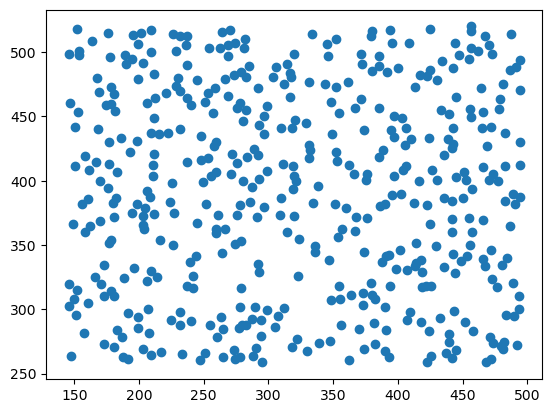

In [65]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()

t_1 = df_rt[df_rt["Time"] == 1].sort_values(by="TrackID")
scat = ax.scatter(t_1["Position X"], t_1["Position Y"])

def animate_scatter(i):
    scat.set_offsets(df_rt[df_rt["Time"] == i].sort_values(by="TrackID")[["Position X", "Position Y"]])
    return scat,

ani = animation.FuncAnimation(fig, animate_scatter, repeat=True, interval=50, frames=range(1,61))
writer = animation.PillowWriter(fps=15,
                                metadata=dict(artist='Me'),
                                bitrate=1800)
ani.save('scatter.gif', writer=writer)

In [59]:
track = df[df["TrackID"] == 1000000014].sort_values(by="Time")
print(track[["Position X", "Position Y"]].to_numpy().T)

[[346.657  346.643  346.621  346.603  346.629  346.599  346.569  346.604
  346.605  346.628  346.594  346.547  346.604  346.59   346.584  346.611
  346.581  346.645  346.611  346.57   346.604  346.589  346.569  346.579
  346.614  346.567  346.586  346.611  346.609  346.556  346.636  346.596
  346.625  346.573  346.612  346.616  346.585  346.576  346.619  346.581
  346.601  346.621  346.588  346.611  346.6    346.579  346.606  346.557
  346.597  346.55   346.596  346.581  346.62   346.576  346.577  346.571
  346.574  346.583  346.571  346.597 ]
 [ 10.7085  10.7085  10.7085  10.7085  10.7085  10.7085  10.7085  10.7085
   10.7085  10.7085  10.7085  10.7085  10.7085  10.7085  10.7085  10.7085
   10.7085  10.7085  10.7085  10.7085  10.7085  10.7085  10.7085  10.7085
   10.7085  10.7085  10.7085  10.7085  10.7085  10.7085  10.7085  10.7085
   10.7085  10.7085  10.7085  10.7085  10.7085  10.7085  10.7085  10.7085
   10.7085  10.7085  10.7085  10.7085  10.7085  10.7085  10.7085  10.7085
   10.

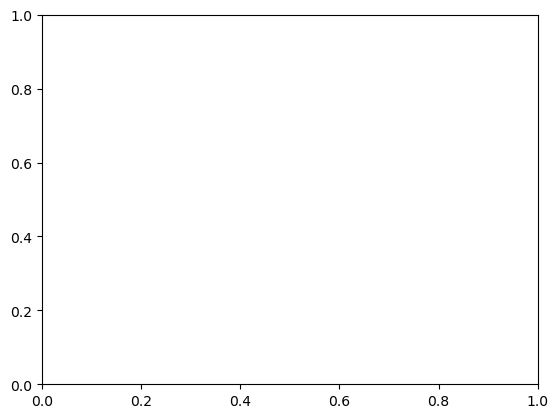

In [68]:
from IPython import display
import time 

fig, ax = plt.subplots()
ax.set(xlim=(120, 530))

for i in range(1, 61):
    #cur = track[track["Time"] == i]
    cur = df_rt[df_rt["Time"] == i]
    ax.set(xlim=(120, 530))
    ax.scatter(cur["Position X"], cur["Position Y"])
    display.display(fig)
    display.clear_output(wait=True)
    ax.cla()

## Filtering for Motile bacteria

model (i)

In [77]:
tracks = pd.unique(df_rt["TrackID"])

mean_x = [] 
mean_y = []
for track_id in tracks:
    movement = df_rt[df_rt["TrackID"] == track_id][["Position X", "Position Y"]]
    mean_x.append(movement["Position X"].mean())
    mean_y.append(movement["Position Y"].mean())
    
    model = t.distributions.normal.Normal(t.tensor([mean_x, mean_y]), scale=t.tensor([1.0,1.0]))
    
    track_probs = t.exp(model.log_prob(t.tensor((movement["Position X"][0], movement["Position Y"][0]))))
    print(track_probs)

tensor([[ 3.7201e-01, 1.0992e-287],
        [1.4734e-293,  3.9894e-01]], dtype=torch.float64)


KeyError: 0

# Bacterial CPM

- either 1 or 2 pixels (2-4 $\mu m$) -> 1 cell is 2 Microns, the unit in the df for positions is Microns
- 

In [ ]:
import torch as t
from scipy import ndimage
import numpy as np
import random
from tqdm import tqdm

In [ ]:
device = t.device('cpu')

In [ ]:
def create_dist_matrix(batch:t.Tensor):
    dist_matrix:np.ndarray = ndimage.distance_transform_edt(1-batch[0].cpu(), return_indices=False)
    dist_matrix = dist_matrix**2
    dist_matrix_t = t.from_numpy(dist_matrix).to(device)
    return dist_matrix_t

In [ ]:
MOORE_OFFSETS = t.tensor([(1, 1), (1, -1), (1, 0), (-1, 0), (0, 0), (-1, 1), (-1, -1), (0, 1), (0, -1)], device=device)
def get_moore_nbh(batch:t.Tensor):
    _, batch_height, _ = batch.shape
    cell_pixel_coords = (batch == 1).nonzero()
    nbh_coords = (cell_pixel_coords[:, 1:].unsqueeze(1)+MOORE_OFFSETS.type(t.float).unsqueeze(0))
    idx_pad = cell_pixel_coords[:, 0].repeat(9,1).T.reshape(cell_pixel_coords[:, 0].shape[0], 9, 1)
    nbh_coords[nbh_coords == -1] = 1
    nbh_coords[nbh_coords == batch_height] = batch_height -2
    return t.concatenate((idx_pad, nbh_coords), dim=-1)

In [ ]:
STEP_SIZES = t.tensor([(1, 0), (0, 1), (-1, 0), (0, -1), (1, 1), (1, -1), (-1, 1), (-1, -1)], device=device)
def MCS(batch, temperature):
    batch_size, batch_height, _ = batch.shape
    
    #########################################################
    # 1. Find source and target coordinates for each sample #
    #########################################################
    # Find all pixels that belong to a cell, or border a cell 
    frontiers = get_moore_nbh(batch)
    src_coords = []
    for batch_idx in range(batch_size):
        frontier = frontiers[frontiers[:, :, 0] == batch_idx, :].unique(dim=0)
        src_coords.append(random.choice(frontier).type(t.long))
    batch_src_coords = t.vstack(src_coords)
    p_f = np.sqrt(2.)
    p_side = (p_f - 1)*p_f/4
    p_diag = (p_f - 1)/4
    step_size_idx = t.tensor(np.random.choice(
            STEP_SIZES.shape[0],
            size=batch_src_coords.shape[0],
            replace=True,
            p=[p_side, p_side, p_side, p_side, p_diag, p_diag, p_diag, p_diag])).type(t.long)
    step_sizes = STEP_SIZES[step_size_idx]
    tgt_coords = t.hstack((batch_src_coords[:, 0].unsqueeze(0).T, batch_src_coords[:, 1:] + step_sizes))
    tgt_coords[:, 1:][tgt_coords[:, 1:] == -1] = 1
    tgt_coords[:, 1:][tgt_coords[:, 1:] == batch_height] = batch_height -2
    tgt_i = tgt_coords[:, 0]
    tgt_j = tgt_coords[:, 1]
    tgt_k = tgt_coords[:, 2]
    src_i = batch_src_coords[:, 0]
    src_j = batch_src_coords[:, 1]
    src_k = batch_src_coords[:, 2]
    
    #########################################################################
    # 2. Calculate the changes in volume that the copy attempts would cause #
    #########################################################################
    current_volumes = t.sum(batch, dim=(-1, -2))
    vol_changes = (-1 * batch[tgt_i, tgt_j, tgt_k]) + batch[src_i, src_j, src_k]
    adjusted_vols = current_volumes + vol_changes
    
    #########################################################
    # 3. Define boolean masks based on the volume changes   #
    #########################################################
    sml_eq_two_mask = adjusted_vols <= 2
    greater_zero_mask = adjusted_vols > 0
    vol_change_positive_mask = vol_changes > 0
    vol_change_negative_mask = vol_changes < 0
    
    #########################################################
    # 4. auto accept each attempt with negative vol. change #
    # that fulfills the hard volume constraint              #
    #########################################################
    auto_upd_mask = t.logical_and(
        vol_change_negative_mask,
        greater_zero_mask
    )
    auto_upd_i = tgt_i[auto_upd_mask]
    auto_upd_j = tgt_j[auto_upd_mask]
    auto_upd_k = tgt_k[auto_upd_mask]
    batch[auto_upd_i, auto_upd_j, auto_upd_k] += vol_changes[auto_upd_mask]
    
    ##################################################################
    # 5. stochastic update of the attempts with positive vol. change #
    ################################################################## 
    update_mask = t.logical_and(
        vol_change_positive_mask,
        sml_eq_two_mask
    )
    update_probability = t.exp(-temperature)
    logit = t.log(t.hstack((update_probability, (1-update_probability))))
    batch_logits = logit.repeat((vol_changes[update_mask].shape[0],1))
    one_hot = t.nn.functional.gumbel_softmax(batch_logits, hard=True)
    
    upd_vals = one_hot[:, 0] * vol_changes[update_mask]
    upd_i = tgt_i[update_mask]
    upd_j = tgt_j[update_mask]
    upd_k = tgt_k[update_mask]
    batch[upd_i, upd_j, upd_k] += upd_vals.squeeze()
    
    return batch

In [ ]:
def step(batch:t.Tensor, dist_matrix:t.Tensor, temperature:t.Tensor, eta:float, num_steps:int, target_distance:float):
    for i in tqdm(range(num_steps)):
        batch = MCS(batch, temperature)
        if t.any(t.sum(batch, dim=(-1,-2)) == 0) or t.any(t.sum(batch, dim=(-1,-2)) > 2):
            print("ISSUE DETECTED, STOP SIM")
            return None, None
    # calc the distance after 100 steps    
    distances = t.sum(batch * dist_matrix, dim=(-1,-2)) / t.sum(batch, dim=(-1,-2))
    mean_distance = t.mean(distances)
    print(f"temperature: {temperature}, update_prob:{t.sigmoid(temperature)} mean distance: {mean_distance}")
    loss = (mean_distance - target_distance)**2
    grad = t.autograd.grad(loss, temperature)[0]
    print(f"gradient: {grad}")
    return t.clamp(temperature - (eta * grad), min=1e-5, max=40.), grad, mean_distance, loss

In [ ]:
temps = t.linspace(-3,3,30)
ref = t.zeros(1,512,512, device=device)
ref[:,256,256] += 1
dist_matrix = create_dist_matrix(ref)
target_distance = 2.

grads = []
mean_distances = []
losses = []
for temp in temps:
    temp.requires_grad_()
    batch = t.zeros(1000,16,16, device=device)
    batch[:,8,8] += 1
    new_temp, grad, mean_distance, loss = step(batch, dist_matrix, temp, eta=1, num_steps=100, target_distance=target_distance)
    grads.append(grad.detach().cpu().numpy())
    mean_distances.append(mean_distance.detach().cpu().numpy())
    losses.append(loss.detach().cpu().numpy())